In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import cv2
import tensorflow as tf
import PIL
import os

from tensorflow import keras
from tensorflow.keras  import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

from sklearn.model_selection import train_test_split

In [ ]:
data_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',cache_dir='.' ,origin=data_url, untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
# to convert data_dir into pathlib  use pathlib....its a Windows path through which we can access all the images in each directory

import pathlib
from pathlib import Path

data_dir = Path('./datasets/flower_photos/flower_photos')
# if we dont do it then we would have to use ** to go to every subdirectory

data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos/flower_photos')

In [ ]:
images  = list(data_dir.glob('*/*.jpg')) # means give me path of every data which has .jpg extension ** means go to every subdirectory / * means any image with .jpg extension
len(images) , images[:5]

(3670,
 [PosixPath('datasets/flower_photos/flower_photos/roses/3265902330_d8b1e44545.jpg'),
  PosixPath('datasets/flower_photos/flower_photos/roses/15566697073_9a214b700e_n.jpg'),
  PosixPath('datasets/flower_photos/flower_photos/roses/269037241_07fceff56a_m.jpg'),
  PosixPath('datasets/flower_photos/flower_photos/roses/2331651885_619653a5d3.jpg'),
  PosixPath('datasets/flower_photos/flower_photos/roses/14172324538_2147808483_n.jpg')])

In [ ]:
roses= list(data_dir.glob('roses/*')) # go to directory named roses in data_dir and give every file in it or we can use .jpg to get every jpg file only
len(roses)

(641,
 [PosixPath('datasets/flower_photos/flower_photos/roses/3265902330_d8b1e44545.jpg'),
  PosixPath('datasets/flower_photos/flower_photos/roses/15566697073_9a214b700e_n.jpg'),
  PosixPath('datasets/flower_photos/flower_photos/roses/269037241_07fceff56a_m.jpg'),
  PosixPath('datasets/flower_photos/flower_photos/roses/2331651885_619653a5d3.jpg'),
  PosixPath('datasets/flower_photos/flower_photos/roses/14172324538_2147808483_n.jpg')])

In [ ]:
tulips= list(data_dir.glob('tulips/*')) # go to directory named roses in data_dir and give every file in it or we can use .jpg to get every jpg file only
len(tulips)

799

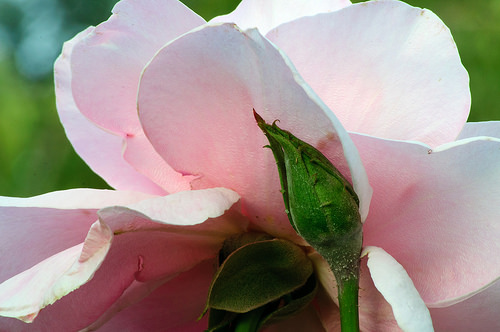

In [ ]:
PIL.Image.open(roses[40]) # it will show us image

In [ ]:
# so we will create a dictionary.....the dictinory will gave roses or flower name as key and their path as value and that value will be in form of list

flower_images_dict = {
    'roses': list(data_dir.glob('roses/*')), # it will give us list of all the roses imgae , the list will be in form of array
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flower_images_dict['roses'][:5] # so each flower will have all the file path for each of their image categories

[PosixPath('datasets/flower_photos/flower_photos/roses/3265902330_d8b1e44545.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/15566697073_9a214b700e_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/269037241_07fceff56a_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/2331651885_619653a5d3.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/14172324538_2147808483_n.jpg')]

In [ ]:
# now we will give them label since we cant use roses as name

flower_label_dict = {
    'roses' : 0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
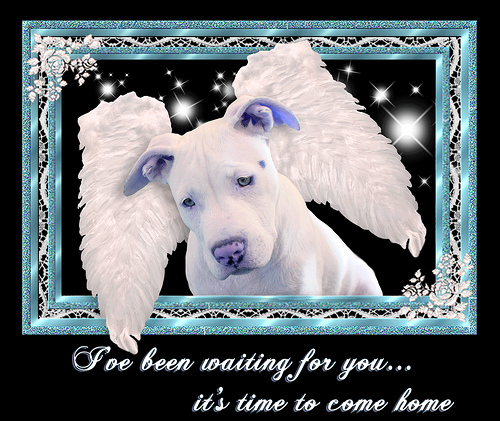

In [ ]:
img  =  cv2.imread(flower_images_dict['roses'][0]) # here we will give a supply path and in return it will gives us numpy array of it since we need to convert image in numer

img # so cv2 took the image and converted it into 3 dimensional numpy array into 3 colour channels

In [ ]:
#since our image dimension are so varying we want to make the dimesion of all the images same to train our model for it , to do it we will use resize

cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X, y =[] , []

for flower_name, images in flower_images_dict.items():
  # here flowe_name is key and images is the by default value of it...its all by default when we go in a loop in a dictionary......

    for image in images:
        img = cv2.imread(str(image)) # open the image and convert it into numpy array cz we cant resize it firectly and store in img so we can resize
        resized_img = cv2.resize(img,(180,180)) # now reesize it
        X.append(resized_img) # append the str of this resized image in X .....like X contain the numpy array of it.....
        y.append(flower_label_dict[flower_name])

In [ ]:
X[0] , y[0]

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 0)

In [ ]:
# for convienence we will convert it into numpy array bcz X contains a list and we converted X into numpy array

#before  Each item in the list is a numpy array (image)

# Convert X and y to numpy arrays
X = np.array(X)  # X is a list of images (each image is a numpy array)
y = np.array(y)  # y is a list of labels (flower categories)

#  X is now a numpy array of shape (num_images, height, width, channels)

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.3 , random_state=42)

In [ ]:
len(X_train)

2569

In [ ]:
#normalize/scale the train and test .....so that the data in numpy array can be in b/w 0 and 1
X_train_scaled = X_train/255
X_test_scaled = X_test/255

# we didnt scaled y bcz y only has 5 labels in it , so no need for now

In [ ]:
model = Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

     layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

     layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(5) # 5 neurons as final output bcz there are totoal 5 flower type, so it is pretty clear that we want to clasify on basis of flower
    # we can use softmax at output as activaiton to get result from numpy array to a set of probablilites which is basically b.w 0 and 1 as probabilites can be b/w 0 and 1

])


model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(X_train_scaled,y_train, validation_split=0.1, epochs=10)

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.3537 - loss: 1.4617 - val_accuracy: 0.5136 - val_loss: 1.1567
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.5774 - loss: 1.0541 - val_accuracy: 0.5914 - val_loss: 1.0387
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.6443 - loss: 0.9137 - val_accuracy: 0.6459 - val_loss: 0.9790
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.7126 - loss: 0.7383 - val_accuracy: 0.5681 - val_loss: 1.1573
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7064 - loss: 0.7352 - val_accuracy: 0.6654 - val_loss: 0.9772
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.8374 - loss: 0.4447 - val_accuracy: 0.6809 - val_loss: 0.9823
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.9010 - loss: 0.2825 - val_accuracy: 0.6537 - val_loss: 1.1616
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.9402 - loss: 0.1927 - val_accuracy: 0.6537 - val_loss

In [ ]:
model.evaluate(X_test_scaled,y_test)
# there is 65% test accuracy which is bad and this is happening bcz of OVERFITTING bcz the training has 98% accuracy causing overfitting which in then making our test accuracy bad/very low......

# we can use data augmentation to resolve this

35/35 ━━━━━━━━━━━━━━━━━━━━ 18s 507ms/step - accuracy: 0.6422 - loss: 1.9268


[1.7708467245101929, 0.6584922671318054]

In [ ]:
predictions = model.predict(X_test_scaled)

35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 292ms/step


In [ ]:
#since the prediciton are in probability score i.e 0 and 1 se we will use argmax function to find the maximum amng all these 5 neurons.......

# like lets say it generated an output prediciton and each sample has probabilities of each neuron which is 5 bcz there are 5 classes......so basically each prediction sample will have a probility of that test sample having probability of being most similiar to that neuron

# liek.....prediction[0] = [0.11113 , 0.3443322 , 0.33566622, 0.7777633, 0.6666633223]
# so these are probilities of each neuron which is basically each flower repectivrly
# now we want to find which one is greatest and find the correspondng label of it....which is basically the label value of it.....

score = tf.nn.softmax(predictions[00]) # bcz softmax converts predictions[0] into a value b.w 0 and 1

np.argmax(score) , y_test[00] # for both of belinged to same flower class


(0, 0)

In [ ]:
from tensorflow.keras import layers

data_augmentation = keras.Sequential([

    layers.RandomZoom(0.3),
    layers.RandomRotation(0.1),
    layers.RandomFlip('horizontal')

    # and so on, there are multiple Random** layers available for augmentation
])


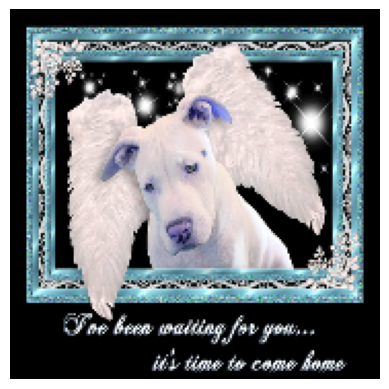

In [ ]:
plt.axis('off')
plt.imshow(X[0])

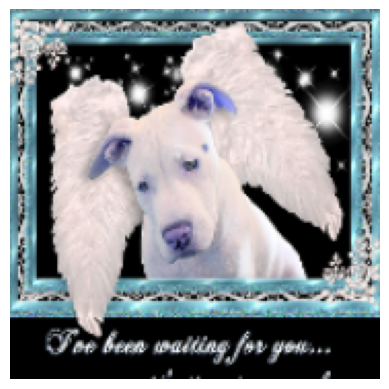

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8")) # converrt it into numpy array
# we have to call i like a funciton ....

In [ ]:
# so here we will apply a data augmentation at first layer and can also use Dropout() to dropout number of neurons in after everry layer after each pass at random , fo better generalization

# The layers.Dropout(0.2) is used to add a Dropout layer to your neural network model in Keras. Dropout is a regularization technique that helps prevent overfitting by randomly setting a fraction of the input units to 0 during training.

# 0.2: This represents the dropout rate, i.e., 20% of the units in the layer will be randomly set to 0 during training.
# This means that each time the model is trained, 20% of the neurons in this layer will be "dropped" or ignored, forcing the network to learn redundant representations and thus improving generalization.

model_1 = Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

     layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Dropout(0.2), # drop 20 % neurons after it ( i think )

     layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(5,activation="softmax")

])


model_1.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

history = model_1.fit(X_train_scaled,y_train, validation_split=0.1, epochs=10)

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.2075 - loss: 3.2532 - val_accuracy: 0.2685 - val_loss: 1.5915
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.2482 - loss: 1.6018 - val_accuracy: 0.2685 - val_loss: 1.5894
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.2459 - loss: 1.5995 - val_accuracy: 0.2685 - val_loss: 1.5887
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.2506 - loss: 1.5968 - val_accuracy: 0.2685 - val_loss: 1.5894
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.2356 - loss: 1.6019 - val_accuracy: 0.2685 - val_loss: 1.5873
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.2435 - loss: 1.5986 - val_accuracy: 0.2685 - val_loss: 1.5887
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.2471 - loss: 1.6003 - val_accuracy: 0.2685 - val_loss: 1.5881
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.2433 - loss: 1.5989 - val_accuracy: 0.2685 - va

In [ ]:
model_1.evaluate(X_test_scaled,y_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 312ms/step - accuracy: 0.2340 - loss: 1.6085


[1.6064683198928833, 0.23705722391605377]

In [ ]:
predictions = model_1.predict(X_test_scaled)

35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 273ms/step


In [ ]:
predict = (np.argmax(predictions)==y_test)
predict

array([False, False, False, ..., False,  True,  True])

In [ ]:
predict = predict.astype(int)

In [ ]:
match = 0
unmatch = 0

for value in predict:  # ✅ Iterating over values directly
    if value == 1:
        match += 1
    else:
        unmatch += 1

match , unmatch

(261, 840)